# Packages

In [82]:
import xarray as xr
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

# Functions and constants

In [83]:
# run cape_all_days.py and cape_extreme_days.py by submitting jobs in GADI on the the terminal to get cape_all_days.nc and cape_extreme_days.nc

# Read data

## CAPE

In [84]:
# Load the NetCDF file for all days
all_days_ds = xr.open_dataset('/Users/edolatamafebrinal/Library/CloudStorage/OneDrive-MonashUniversity/Study@Monash/Semester 3/Data Analysis in Earth Sciences/github/daes_project/environment_conditions/cape/cape_all_days.nc')
cape_all_days = all_days_ds['cape'].values.flatten()
cape_all_days = cape_all_days[~np.isnan(cape_all_days)]  # Remove NaNs efficiently

# Load extreme CAPE values from CSV 
extreme_csv_path = '/Users/edolatamafebrinal/Library/CloudStorage/OneDrive-MonashUniversity/Study@Monash/Semester 3/Data Analysis in Earth Sciences/github/daes_project/environment_conditions/cape/cape_extreme_days.csv'
try:
    extreme_df = pd.read_csv(extreme_csv_path)
    cape_extreme_days = extreme_df['cape'].dropna().values  # Ensure no NaNs
except FileNotFoundError:
    print(f"Warning: {extreme_csv_path} not found. Proceeding with empty extreme days data.")
    cape_extreme_days = np.array([])  # Handle missing file case

## CIN

In [85]:
# Load the NetCDF file for all days
all_days_ds = xr.open_dataset('/Users/edolatamafebrinal/Library/CloudStorage/OneDrive-MonashUniversity/Study@Monash/Semester 3/Data Analysis in Earth Sciences/github/daes_project/environment_conditions/cin/cin_all_days.nc')  
cin_all_days = all_days_ds['cin'].values.flatten()  
cin_all_days = cin_all_days[~np.isnan(cin_all_days)] 

# Load extreme CIN values from CSV 
extreme_csv_path = '/Users/edolatamafebrinal/Library/CloudStorage/OneDrive-MonashUniversity/Study@Monash/Semester 3/Data Analysis in Earth Sciences/github/daes_project/environment_conditions/cin/cin_extreme_days.csv'  
try:
    extreme_df = pd.read_csv(extreme_csv_path)
    cin_extreme_days = extreme_df['cin'].dropna().values  
except FileNotFoundError:
    print(f"Warning: {extreme_csv_path} not found. Proceeding with empty extreme days data.")
    cin_extreme_days = np.array([])  

## K-Index

In [86]:
# Load the NetCDF file and extract the 'K_index' variable for all days
all_days = xr.open_dataset('/Users/edolatamafebrinal/Library/CloudStorage/OneDrive-MonashUniversity/Study@Monash/Semester 3/Data Analysis in Earth Sciences/github/daes_project/environment_conditions/kindex/kindex_all_days.nc')
k_index_all_days = all_days['K_index'].values.flatten()  # Flatten to 1D array
k_index_all_days_clean = k_index_all_days[~np.isnan(k_index_all_days)]  # Remove NaN values

# Load the CSV file for extreme days
extreme_days = pd.read_csv('/Users/edolatamafebrinal/Library/CloudStorage/OneDrive-MonashUniversity/Study@Monash/Semester 3/Data Analysis in Earth Sciences/github/daes_project/environment_conditions/kindex/kindex_extreme_days.csv', parse_dates=['date'])
k_index_extreme_days_clean = extreme_days['K_index'].dropna()  # Remove NaN values

## TPWV

In [87]:
# Load all days dataset and extract TCWV values
all_days = xr.open_dataset('/Users/edolatamafebrinal/Library/CloudStorage/OneDrive-MonashUniversity/Study@Monash/Semester 3/Data Analysis in Earth Sciences/github/daes_project/environment_conditions/tcwv/tcwv_all_days.nc')
tcwv_all_days = all_days['tcwv'].values.flatten()
all_days_df = pd.DataFrame({'tcwv': tcwv_all_days}).dropna()

# Load extreme tcwv values from CSV 
extreme_csv_path = '/Users/edolatamafebrinal/Library/CloudStorage/OneDrive-MonashUniversity/Study@Monash/Semester 3/Data Analysis in Earth Sciences/github/daes_project/environment_conditions/tcwv/tcwv_extreme_days.csv'
try:
    extreme_df = pd.read_csv(extreme_csv_path)
    extreme_days_df = extreme_df['tcwv'].dropna().values  # Ensure no NaNs
except FileNotFoundError:
    print(f"Warning: {extreme_csv_path} not found. Proceeding with empty extreme days data.")
    extreme_days_df = np.array([])  # Handle missing file case

## Wind

In [96]:
# Load the datasets for extreme days and all days
file_extreme = '/Users/edolatamafebrinal/Library/CloudStorage/OneDrive-MonashUniversity/Study@Monash/Semester 3/Data Analysis in Earth Sciences/github/daes_project/environment_conditions/wind/wind_time_avg_levels_extreme_days.nc'
file_all_days = '/Users/edolatamafebrinal/Library/CloudStorage/OneDrive-MonashUniversity/Study@Monash/Semester 3/Data Analysis in Earth Sciences/github/daes_project/environment_conditions/wind/wind_time_avg_levels_all_days.nc'

ds_extreme = xr.open_dataset(file_extreme)
ds_all_days = xr.open_dataset(file_all_days)

# Extract wind speed, wind direction, latitude, longitude, and levels
wind_speed_extreme = ds_extreme['wind_speed']
wind_direction_extreme = ds_extreme['wind_direction']

wind_speed_all_days = ds_all_days['wind_speed']
wind_direction_all_days = ds_all_days['wind_direction']

latitude = ds_extreme['latitude']
longitude = ds_extreme['longitude']
levels = ds_extreme['level']

## RH

In [97]:
# Load datasets for all days and extreme days for 20 stations
all_days_path = '/Users/edolatamafebrinal/Library/CloudStorage/OneDrive-MonashUniversity/Study@Monash/Semester 3/Data Analysis in Earth Sciences/github/daes_project/environment_conditions/rh/rh_all_days.nc'
extreme_days_path = '/Users/edolatamafebrinal/Library/CloudStorage/OneDrive-MonashUniversity/Study@Monash/Semester 3/Data Analysis in Earth Sciences/github/daes_project/environment_conditions/rh/rh_extreme_days.nc'

all_days_station = xr.open_dataset(all_days_path)
extreme_days_station = xr.open_dataset(extreme_days_path)

# Analysis

## CAPE

In [98]:
# Compute mean CAPE values
cape_mean_all_days = np.mean(cape_all_days) if cape_all_days.size else np.nan
cape_mean_extreme_days = np.mean(cape_extreme_days) if cape_extreme_days.size else np.nan

## CIN

In [99]:
# Compute mean CIN values
cin_mean_all_days = np.mean(cin_all_days) if cin_all_days.size else np.nan
cin_mean_extreme_days = np.mean(cin_extreme_days) if cin_extreme_days.size else np.nan

## K-Index

In [100]:
# Compute min and max for bin range
min_value = min(k_index_all_days_clean.min(), k_index_extreme_days_clean.min())
max_value = max(k_index_all_days_clean.max(), k_index_extreme_days_clean.max())

# Define bins for histogram
bins = np.linspace(min_value, max_value, 100)

# Compute mean values
kindex_mean_all_days = np.mean(k_index_all_days_clean)
kindex_mean_extreme_days = np.mean(k_index_extreme_days_clean)

## TPWV

In [101]:
# Compute means only if the extreme days data is available
tcwv_mean_all_days = all_days_df['tcwv'].mean()
tcwv_mean_extreme_days = extreme_days_df.mean() if len(extreme_days_df) > 0 else np.nan

## Wind

In [103]:
# Calculate wind speed anomaly: extreme days - all days
wind_speed_anomaly = wind_speed_extreme - wind_speed_all_days

# Calculate wind direction anomaly (extreme days - all days) by subtracting direction angles
# Wrap the result to stay within the range of 0 to 360 degrees
wind_direction_anomaly = (wind_direction_extreme - wind_direction_all_days) % 360

## RH

In [104]:
# Compute the average across all stations for all days and extreme days
all_days_average = all_days_station.mean(dim='station')
extreme_days_average = extreme_days_station

# Calculate the anomaly as the difference between extreme and all days averages
anomaly_r = extreme_days_average - all_days_average

# Extract the 'r' variable (Relative Humidity) for plotting
anomaly_r_dataarray = anomaly_r['r']

# Plots

## CAPE

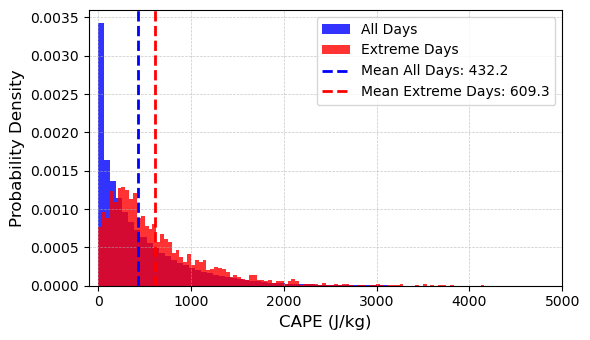

In [105]:
# Create the histogram
plt.figure(figsize=(6, 3.5))  # Set figure size

# Histogram for all days (blue)
plt.hist(
    cape_all_days, bins=100, density=True, alpha=0.8, color='blue', label='All Days'
)

# Histogram for extreme precipitation days (red)
plt.hist(
    cape_extreme_days, bins=100, density=True, alpha=0.8, color='red', label='Extreme Days'
)

# Plot vertical lines for the means
plt.axvline(cape_mean_all_days, color='blue', linestyle='dashed', linewidth=2, label=f'Mean All Days: {cape_mean_all_days:.1f}')
plt.axvline(cape_mean_extreme_days, color='red', linestyle='dashed', linewidth=2, label=f'Mean Extreme Days: {cape_mean_extreme_days:.1f}')

# Labels and title
plt.xlabel('CAPE (J/kg)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.xlim(-100, 5000)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)  # Add grid
plt.legend()  # Add legend

# Show plot
plt.tight_layout()
plt.show()

## CIN

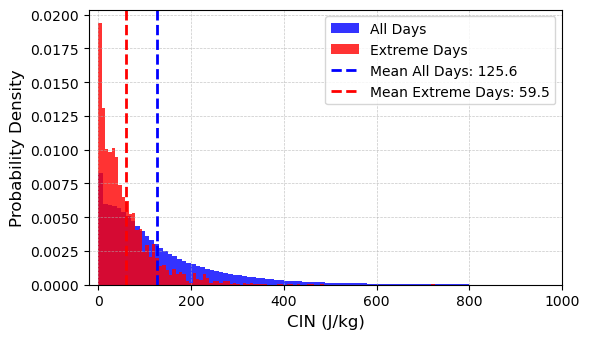

In [106]:
# Create the histogram
plt.figure(figsize=(6, 3.5))  # Set figure size

# Histogram for all days (blue)
plt.hist(
    cin_all_days, bins=100, density=True, alpha=0.8, color='blue', label='All Days'
)

# Histogram for extreme precipitation days (red)
plt.hist(
    cin_extreme_days, bins=100, density=True, alpha=0.8, color='red', label='Extreme Days'
)

# Plot vertical lines for the means
plt.axvline(cin_mean_all_days, color='blue', linestyle='dashed', linewidth=2, label=f'Mean All Days: {cin_mean_all_days:.1f}')
plt.axvline(cin_mean_extreme_days, color='red', linestyle='dashed', linewidth=2, label=f'Mean Extreme Days: {cin_mean_extreme_days:.1f}')

# Labels and title
plt.xlabel('CIN (J/kg)', fontsize=12)  
plt.ylabel('Probability Density', fontsize=12)
plt.xlim(-20, 1000)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend() 

# Show plot
plt.tight_layout()
plt.show()

# K-Index

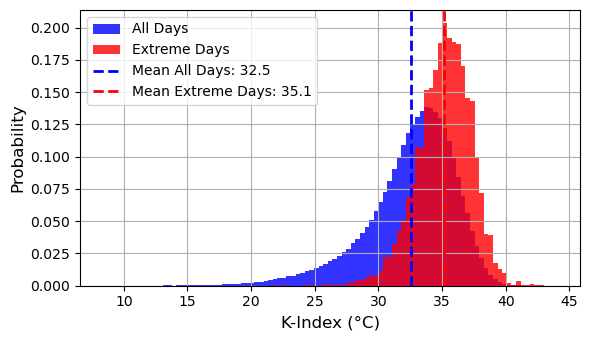

In [107]:
plt.figure(figsize=(6, 3.5))

# Histogram plots (PDF)
plt.hist(k_index_all_days_clean, bins=bins, density=True, alpha=0.8, color='blue', label='All Days')
plt.hist(k_index_extreme_days_clean, bins=bins, density=True, alpha=0.8, color='red', label='Extreme Days')

# Vertical dashed lines for mean values
plt.axvline(kindex_mean_all_days, color='blue', linestyle='dashed', linewidth=2, label=f'Mean All Days: {kindex_mean_all_days:.1f}')
plt.axvline(kindex_mean_extreme_days, color='red', linestyle='dashed', linewidth=2, label=f'Mean Extreme Days: {kindex_mean_extreme_days:.1f}')

# Labels, legend, and grid
plt.xlabel('K-Index (°C)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## TPWV

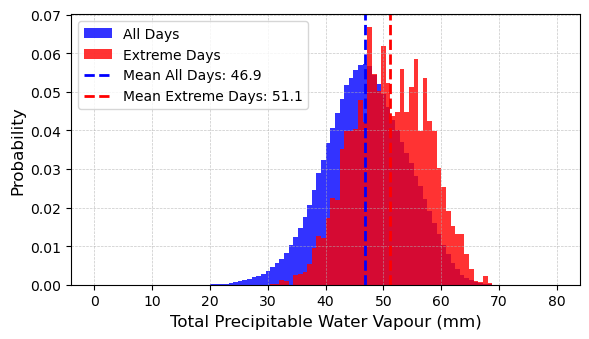

In [108]:
# Create histogram plot
plt.figure(figsize=(6, 3.5))
bins = np.linspace(0, 80, 101)

# Plot histogram for all days (blue)
plt.hist(
    all_days_df['tcwv'], bins=bins, density=True, alpha=0.8, 
    color='blue', label='All Days'
)

# Only plot extreme days if data is available
if len(extreme_days_df) > 0:
    plt.hist(
        extreme_days_df, bins=bins, density=True, alpha=0.8, 
        color='red', label='Extreme Days'
    )

# Add vertical dashed lines for mean values with labels
plt.axvline(mean_all_days, color='blue', linestyle='dashed', linewidth=2, 
             label=f'Mean All Days: {tcwv_mean_all_days:.1f}')
if len(extreme_days_df) > 0:
    plt.axvline(mean_extreme_days, color='red', linestyle='dashed', linewidth=2, 
                 label=f'Mean Extreme Days: {tcwv_mean_extreme_days:.1f}')

# Labels and title
plt.xlabel('Total Precipitable Water Vapour (mm)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Wind

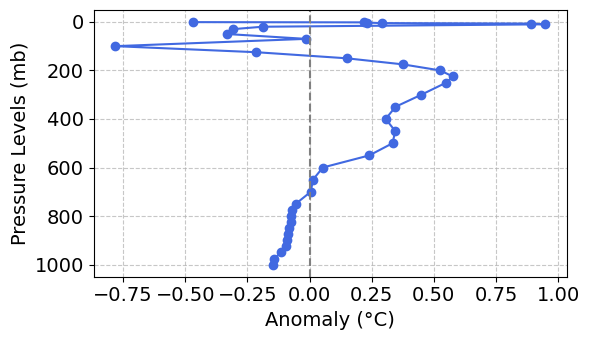

In [109]:
# Plot the anomaly 't' values against all levels
plt.figure(figsize=(6, 3.5))
plt.plot(mean_anomaly, mean_anomaly['level'], marker='o', linestyle='-', color='royalblue')  # Set line color to blue
plt.gca().invert_yaxis()  # Invert y-axis to show levels in the correct order
plt.axvline(x=0, color='gray', linestyle='--')  # Add a vertical line at t = 0
plt.xlabel('Anomaly (°C)', fontsize=14)
plt.ylabel('Pressure Levels (mb)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.title('Mean Vertical Profile of Temperature Anomalies of Extreme Events (°C)')
plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

## RH

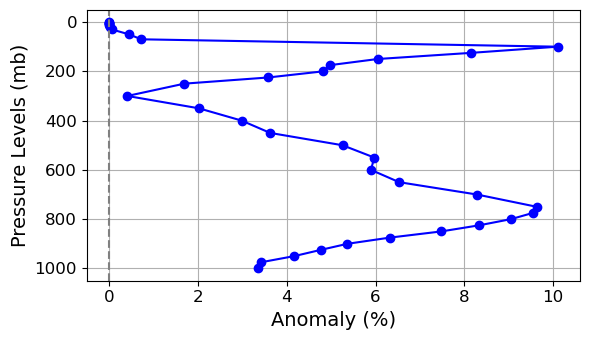

In [110]:
# Plot the anomaly 'r' values against the vertical levels
plt.figure(figsize=(6, 3.5))
plt.plot(anomaly_r_dataarray, anomaly_r_dataarray['level'], marker='o', color='blue')

# Invert the y-axis to show levels in increasing order
plt.gca().invert_yaxis()

# Add a vertical line at 0 anomaly for reference
plt.axvline(x=0, color='gray', linestyle='--')

# Label the axes and set the font size
plt.xlabel('Anomaly (%)', fontsize=14)
plt.ylabel('Pressure Levels (mb)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

## Combination

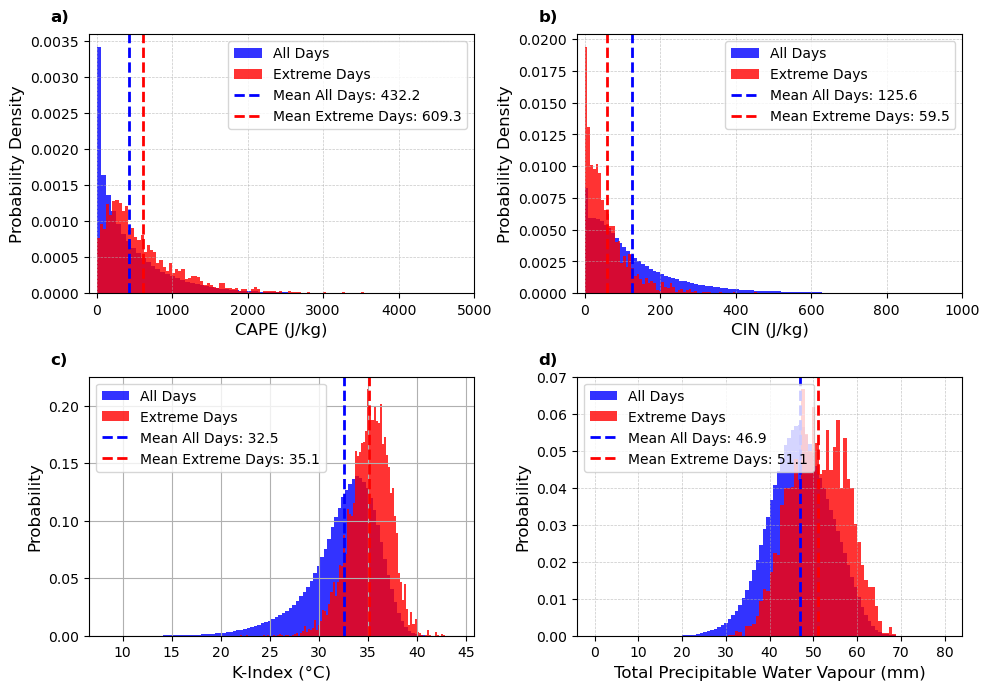

In [111]:
# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Define plot labels
labels = ['a)', 'b)', 'c)', 'd)']

# First plot (CAPE Histogram)
ax = axes[0, 0]
ax.hist(cape_all_days, bins=100, density=True, alpha=0.8, color='blue', label='All Days')
ax.hist(cape_extreme_days, bins=100, density=True, alpha=0.8, color='red', label='Extreme Days')
ax.axvline(cape_mean_all_days, color='blue', linestyle='dashed', linewidth=2, label=f'Mean All Days: {cape_mean_all_days:.1f}')
ax.axvline(cape_mean_extreme_days, color='red', linestyle='dashed', linewidth=2, label=f'Mean Extreme Days: {cape_mean_extreme_days:.1f}')
ax.set_xlabel('CAPE (J/kg)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xlim(-100, 5000)
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
ax.legend()
ax.text(-0.1, 1.05, labels[0], transform=ax.transAxes, fontsize=12, fontweight='bold')

# Second plot (CIN Histogram)
ax = axes[0, 1]
ax.hist(cin_all_days, bins=100, density=True, alpha=0.8, color='blue', label='All Days')
ax.hist(cin_extreme_days, bins=100, density=True, alpha=0.8, color='red', label='Extreme Days')
ax.axvline(cin_mean_all_days, color='blue', linestyle='dashed', linewidth=2, label=f'Mean All Days: {cin_mean_all_days:.1f}')
ax.axvline(cin_mean_extreme_days, color='red', linestyle='dashed', linewidth=2, label=f'Mean Extreme Days: {cin_mean_extreme_days:.1f}')
ax.set_xlabel('CIN (J/kg)', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_xlim(-20, 1000)
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
ax.legend()
ax.text(-0.1, 1.05, labels[1], transform=ax.transAxes, fontsize=12, fontweight='bold')

# Third plot (K-Index Histogram)
ax = axes[1, 0]
ax.hist(k_index_all_days_clean, bins=100, density=True, alpha=0.8, color='blue', label='All Days')
ax.hist(k_index_extreme_days_clean, bins=100, density=True, alpha=0.8, color='red', label='Extreme Days')
ax.axvline(kindex_mean_all_days, color='blue', linestyle='dashed', linewidth=2, label=f'Mean All Days: {kindex_mean_all_days:.1f}')
ax.axvline(kindex_mean_extreme_days, color='red', linestyle='dashed', linewidth=2, label=f'Mean Extreme Days: {kindex_mean_extreme_days:.1f}')
ax.set_xlabel('K-Index (°C)', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.grid(True)
ax.legend()
ax.text(-0.1, 1.05, labels[2], transform=ax.transAxes, fontsize=12, fontweight='bold')

# Fourth plot (Total Precipitable Water Vapour Histogram)
ax = axes[1, 1]
bins = np.linspace(0, 80, 101)
ax.hist(all_days_df['tcwv'], bins=bins, density=True, alpha=0.8, color='blue', label='All Days')
ax.hist(extreme_days_df, bins=bins, density=True, alpha=0.8, color='red', label='Extreme Days')
ax.axvline(tcwv_mean_all_days, color='blue', linestyle='dashed', linewidth=2, label=f'Mean All Days: {tcwv_mean_all_days:.1f}')
ax.axvline(tcwv_mean_extreme_days, color='red', linestyle='dashed', linewidth=2, label=f'Mean Extreme Days: {tcwv_mean_extreme_days:.1f}')
ax.set_xlabel('Total Precipitable Water Vapour (mm)', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
ax.legend()

# Add subplot label (e.g., "d)" in upper left corner)
ax.text(-0.1, 1.05, labels[3], transform=ax.transAxes, fontsize=12, fontweight='bold')
# Adjust layout
plt.tight_layout()
plt.savefig('13.tiff', dpi=300, format='tiff')
plt.show()

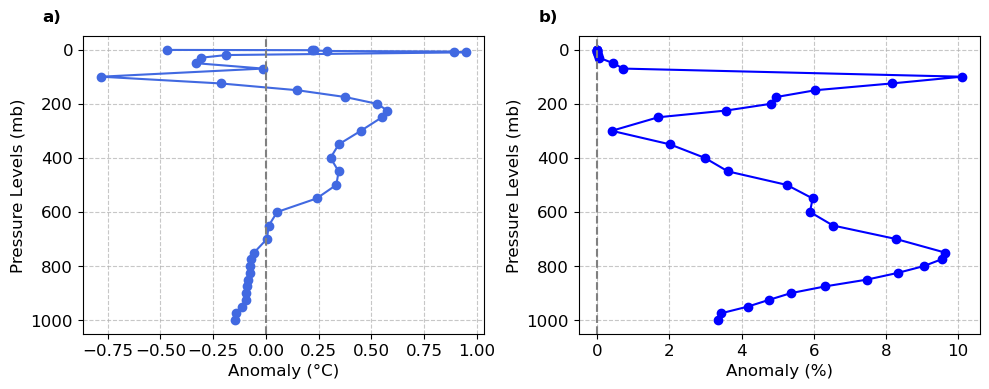

In [112]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Labels for each subplot
labels = ['a)', 'b)']

# First plot (Temperature Anomalies)
ax = axes[0]
ax.plot(mean_anomaly, mean_anomaly['level'], marker='o', linestyle='-', color='royalblue')
ax.invert_yaxis()  # Invert y-axis to show levels correctly
ax.axvline(x=0, color='gray', linestyle='--')  # Add a vertical line at t = 0
ax.set_xlabel('Anomaly (°C)', fontsize=12)
ax.set_ylabel('Pressure Levels (mb)', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle="--", alpha=0.7)
ax.text(-0.1, 1.05, labels[0], transform=ax.transAxes, fontsize=12, fontweight='bold')

# Second plot (Humidity Anomalies)
ax = axes[1]
ax.plot(anomaly_r_dataarray, anomaly_r_dataarray['level'], marker='o', color='blue')
ax.invert_yaxis()  # Invert y-axis for correct display
ax.axvline(x=0, color='gray', linestyle='--')  # Reference line
ax.set_xlabel('Anomaly (%)', fontsize=12)
ax.set_ylabel('Pressure Levels (mb)', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle="--", alpha=0.7)
ax.text(-0.1, 1.05, labels[1], transform=ax.transAxes, fontsize=12, fontweight='bold')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('14.tiff', dpi=300, format='tiff')
plt.show()